In [3]:
import pandas as pd

X_encoded= pd.read_csv('../files_source\X_encoded.csv')
X_encoded

<>:3: SyntaxWarning: invalid escape sequence '\X'
<>:3: SyntaxWarning: invalid escape sequence '\X'
C:\Users\phili\AppData\Local\Temp\ipykernel_19164\1089261302.py:3: SyntaxWarning: invalid escape sequence '\X'
  X_encoded= pd.read_csv('../files_source\X_encoded.csv')


,Unnamed: 0,runtimeMinutes,averageRating,numVotes,budget,popularity,revenue,titleType_movie,titleType_short,periode_1990,...,genre_Fantasy,genre_Family,genre_Adult,genre_Horror,genre_Comedy,genre_Romance,genre_Adventure,genre_War,genre_Musical,genre_Thriller
0,0,0.574998,0.436485,-0.194459,-0.226067,-0.115108,-0.152982,True,False,True,...,False,False,False,False,False,True,False,False,False,False
1,1,1.074181,0.508337,0.915679,2.348272,0.189429,0.943853,True,False,False,...,True,False,False,False,True,True,False,False,False,False
2,2,-1.671326,-1.647228,-0.192409,-0.226067,-0.119859,-0.152982,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,3,-1.920918,-0.856854,-0.191832,-0.226067,-0.103548,-0.152982,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,4,1.198977,0.723894,-0.094445,0.417518,0.031054,-0.152982,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53295,53295,-1.827321,1.298712,-0.194692,-0.224029,-0.119859,-0.152982,False,True,False,...,False,False,False,False,False,False,False,False,False,False
53296,53296,-2.045713,0.005372,-0.187941,-0.226067,-0.045197,-0.152982,False,True,False,...,False,False,False,True,False,False,False,False,False,False
53297,53297,-2.139310,1.083155,-0.194521,-0.226067,-0.119859,-0.152982,False,True,False,...,False,False,False,False,False,False,False,False,False,False
53298,53298,0.574998,-0.210185,-0.193919,-0.226067,-0.108095,-0.152982,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
X_encoded = X_encoded.drop(['Unnamed: 0'], axis =1)

In [5]:
# Normalisation 

# import warnings
# warnings.filterwarnings("ignore", category=UserWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)

# def encodage_X(X, type='standard'):
#   index = X.index
#   X_num = X.select_dtypes('number')
#   X_cat = X.select_dtypes(['object', 'category', 'string'])
#   # Comme ça les dates, on n'y touche pas

#   if type == 'standard':
#     from sklearn.preprocessing import StandardScaler
#     SN = StandardScaler()
#     X_num_SN = pd.DataFrame(SN.fit_transform(X_num), columns=X_num.columns, index=index)

#   else:
#     from sklearn.preprocessing import MinMaxScaler
#     SN = MinMaxScaler()
#     X_num_SN = pd.DataFrame(SN.fit_transform(X_num), columns=X_num.columns, index=index)

#   X_cat_dummies = pd.get_dummies(X_cat)
#   X_encoded = pd.concat([X_num_SN, X_cat_dummies], axis=1)

#   return X_encoded, SN

In [2]:
# X_encoded, SN = encodage_X(df_movies_X, type='Normalisation')
# X_encoded

NameError: name 'encodage_X' is not defined

In [13]:
# def encodage_predict(df_a_predire):
#   X_num = df_a_predire.select_dtypes('number')
#   X_cat = df_a_predire.select_dtypes(['object', 'category', 'string'])
  

#   X_num_SN = pd.DataFrame(SN.transform(X_num), columns=X_num.columns).reset_index(drop=True)

#   X_cat_dummies = pd.get_dummies(X_cat).reset_index(drop=True)
#   X_encoded_predire = pd.concat([X_num_SN, X_cat_dummies], axis=1)

#   df_predict = X_encoded_predire

#   # DataFrame vide qui a les mêmes colonnes que X_encoded
#   df_final = pd.DataFrame(columns=X_encoded.columns)

#   # On veut que le DataFrame ait le même nombre de lignes que df_predict
#   df_final = df_final.reindex(index=df_predict.index)
#   # On met tous les NaN à False
#   df_final = df_final.fillna(False)

#   # On parcourt chaque colonne de df_predict
#   # Si la colonne est présente dans X_encoded alors on la garde
#   # Sinon, on la met à False
#   for column in df_predict.columns:
#     if column in X_encoded.columns:
#       df_final[column] = df_predict[column]

#   return df_final

In [10]:
# entrainement du modèle 
import numpy as np
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(n_neighbors=4, metric='euclidean')
model.fit(X_encoded)





NearestNeighbors(metric='euclidean', n_neighbors=4)

In [12]:
def evaluate_k(X_encoded, k_range):
    """
    Évalue différentes valeurs de k en utilisant la somme des distances aux voisins
    et le score de silhouette comme métriques.

    Args:
        X_encoded (DataFrame): Données normalisées
        k_range (range): Plage de valeurs de k à tester

    Returns:
        tuple: (distances moyennes, scores de silhouette)
    """
    from sklearn.metrics import silhouette_score
    from sklearn.cluster import KMeans

    avg_distances = []
    silhouette_scores = []

    for k in k_range:
        # Calcul des distances moyennes pour chaque k
        model = NearestNeighbors(n_neighbors=k)
        model.fit(X_encoded)
        distances, _ = model.kneighbors(X_encoded)
        avg_distances.append(np.mean(distances))

        # Calcul du score de silhouette
        # Nous utilisons KMeans pour créer des clusters et évaluer la qualité
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(X_encoded)
        if k > 1:  # Le score de silhouette nécessite au moins 2 clusters
            silhouette_scores.append(silhouette_score(X_encoded, clusters))
        else:
            silhouette_scores.append(0)

    return avg_distances, silhouette_scores

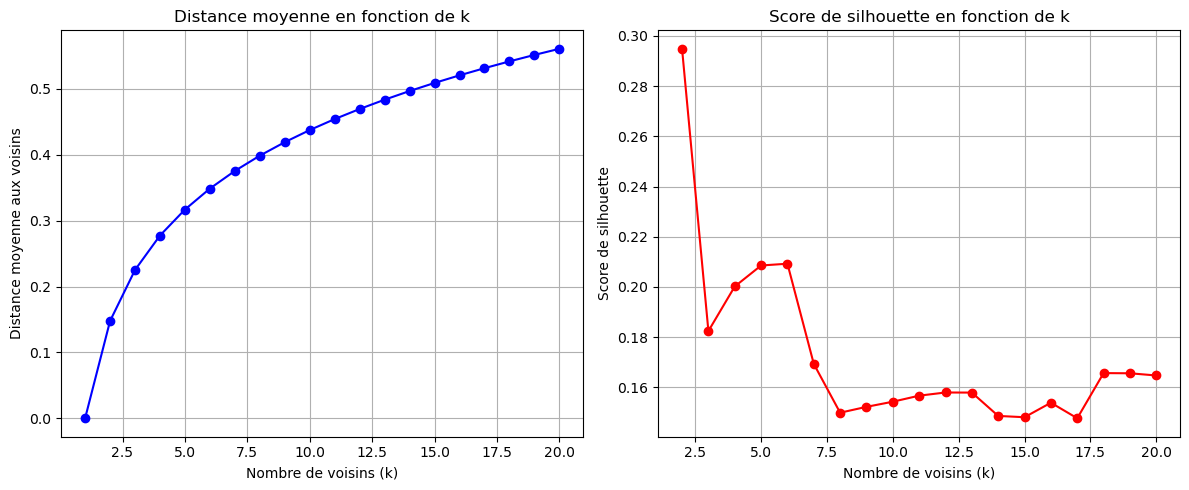

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définition de la plage de k à tester
k_range = range(1, 21)  # Test des valeurs de k de 1 à 20

# Évaluation des différentes valeurs de k
avg_distances, silhouette_scores = evaluate_k(X_encoded, k_range)

# Création d'une visualisation pour aider à choisir k
plt.figure(figsize=(12, 5))

# Premier graphique : Distance moyenne aux voisins
plt.subplot(1, 2, 1)
plt.plot(k_range, avg_distances, 'bo-')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Distance moyenne aux voisins')
plt.title('Distance moyenne en fonction de k')
plt.grid(True)

# Second graphique : Score de silhouette
plt.subplot(1, 2, 2)
plt.plot(k_range[1:], silhouette_scores[1:], 'ro-')  # On commence à k=2
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction de k')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# filmindex = df_movies[dfmovies['originalTitle'] == 'Avatar'].index[0]  #Je prends l'index du film
# listei = list(X_encoded.iloc[film_index][:])    #Je fais une liste avec toutes les colonnes de l'index qui ont été normalisé
# x1 = np.array([liste_i])  #je le mets en array pour qu'il soit accepté dans le nn.kneighbors
# x1.reshape(1,-1)   #pas nécessaire apparemment voir en dessous
# distances, indices = nn.kneighbors(x1)

# print(f"\nFilm les plus similaires à 😊
# for distance, index in zip(distances[0][1:], indices[0][1:]):
#       print(f"{df_movies['originalTitle'].iloc[index]} (Distance: {distance:.2f})")

In [14]:
X_encoded.columns

Index(['runtimeMinutes', 'averageRating', 'numVotes', 'budget', 'popularity',
       'revenue', 'titleType_movie', 'titleType_short', 'periode_1990',
       'periode_2000', 'periode_2010', 'periode_2020', 'isAdult',
       'genre_Animation', 'genre_Action', 'genre_Crime', 'genre_Documentary',
       'genre_Music', 'genre_Biography', 'genre_Sci-Fi', 'genre_Drama',
       'genre_History', 'genre_Mystery', 'genre_News', 'genre_Western',
       'genre_Sport', 'genre_Reality-TV', 'genre_Short', 'genre_Fantasy',
       'genre_Family', 'genre_Adult', 'genre_Horror', 'genre_Comedy',
       'genre_Romance', 'genre_Adventure', 'genre_War', 'genre_Musical',
       'genre_Thriller'],
      dtype='object')

In [15]:
df_movies5= pd.read_csv('../files_source\df_movies5.csv')
df_movies5

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\phili\AppData\Local\Temp\ipykernel_19164\3971475958.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_movies5= pd.read_csv('../files_source\df_movies5.csv')


,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,...,genre_Fantasy,genre_Family,genre_Adult,genre_Horror,genre_Comedy,genre_Romance,genre_Adventure,genre_War,genre_Musical,genre_Thriller
0,0,tt0015724,movie,Dama de noche,Dama de noche,False,1993-01-01,102.0,6.3,31,...,False,False,False,False,False,True,False,False,False,False
1,1,tt0035423,movie,Kate & Leopold,Kate & Leopold,False,2001-01-01,118.0,6.4,90461,...,True,False,False,False,True,True,False,False,False,False
2,2,tt0040844,short,Crossroads of Laredo,Crossroads of Laredo,False,1995-01-01,30.0,3.4,198,...,False,False,False,False,False,False,False,False,False,False
3,3,tt0050396,short,Final Curtain,Final Curtain,False,2012-01-01,22.0,4.5,245,...,False,False,False,True,False,False,False,False,False,False
4,4,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,False,2018-01-01,122.0,6.7,8178,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53295,53295,tt9908904,short,Automat,Automat,False,2019-01-01,25.0,7.5,12,...,False,False,False,False,False,False,False,False,False,False
53296,53296,tt9909186,short,Stucco,Stucco,False,2019-01-01,18.0,5.7,562,...,False,False,False,True,False,False,False,False,False,False
53297,53297,tt9909596,short,Cake Day,Cake Day,False,2020-01-01,15.0,7.2,26,...,False,False,False,False,False,False,False,False,False,False
53298,53298,tt9913660,movie,No Apology,No Apology,False,2019-01-01,102.0,5.4,75,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df_movies5 = df_movies5.drop(['Unnamed: 0'], axis =1)

In [17]:
# On va ensuite récupérer ses caractéristiques
caracteristiques = ['runtimeMinutes', 'averageRating', 'numVotes', 'budget', 'popularity',
       'revenue', 'titleType_movie', 'titleType_short', 'periode_1990',
       'periode_2000', 'periode_2010', 'periode_2020', 'isAdult',
       'genre_Animation', 'genre_Action', 'genre_Crime', 'genre_Documentary',
       'genre_Music', 'genre_Biography', 'genre_Sci-Fi', 'genre_Drama',
       'genre_History', 'genre_Mystery', 'genre_News', 'genre_Western',
       'genre_Sport', 'genre_Reality-TV', 'genre_Short', 'genre_Fantasy',
       'genre_Family', 'genre_Adult', 'genre_Horror', 'genre_Comedy',
       'genre_Romance', 'genre_Adventure', 'genre_War', 'genre_Musical',
       'genre_Thriller']
# 
caract_titre = df_movies5[df_movies5['originalTitle'] == 'Intouchables']
# caract_titre = caract_titre[caracteristiques]



In [28]:
X_encoded.iloc[33073,]

isAdult                    0.0
runtimeMinutes        0.464435
averageRating         0.833333
numVotes              0.321388
budget                0.028261
popularity            0.009035
revenue               0.145907
periode               0.666667
genre_Fantasy              0.0
genre_Sport                0.0
genre_Family               0.0
genre_Animation            0.0
genre_Sci-Fi               0.0
genre_Drama                1.0
genre_Documentary          0.0
genre_Crime                0.0
genre_Western              0.0
genre_Short                0.0
genre_Horror               0.0
genre_Biography            0.0
genre_Reality-TV           0.0
genre_Adventure            0.0
genre_Action               0.0
genre_Musical              0.0
genre_Adult                0.0
genre_Music                0.0
genre_War                  0.0
genre_History              0.0
genre_Romance              0.0
genre_Thriller             0.0
genre_Mystery              0.0
genre_News                 0.0
genre_Co

In [29]:
df_movies_X.columns

Index(['titleType', 'isAdult', 'runtimeMinutes', 'averageRating', 'numVotes',
       'budget', 'popularity', 'revenue', 'periode', 'genre_Fantasy',
       'genre_Sport', 'genre_Family', 'genre_Animation', 'genre_Sci-Fi',
       'genre_Drama', 'genre_Talk-Show', 'genre_Documentary', 'genre_Crime',
       'genre_Western', 'genre_Short', 'genre_Horror', 'genre_Biography',
       'genre_Reality-TV', 'genre_Adventure', 'genre_Action', 'genre_Musical',
       'genre_Adult', 'genre_Music', 'genre_War', 'genre_History',
       'genre_Romance', 'genre_Thriller', 'genre_Mystery', 'genre_News',
       'genre_Comedy'],
      dtype='object')

In [19]:
filmindex = df_movies5[dfmovies5['originalTitle'] == 'Avatar'].index[0]  #Je prends l'index du film
listei = list(X_encoded.iloc[film_index][:])    #Je fais une liste avec toutes les colonnes de l'index qui ont été normalisé
x1 = np.array([liste_i])  #je le mets en array pour qu'il soit accepté dans le nn.kneighbors
x1.reshape(1,-1)   #pas nécessaire apparemment voir en dessous
distances, indices = model.kneighbors(x1)

print(f"\nFilm les plus similaires à :/
for distance, index in zip(distances[0][1:], indices[0][1:]):
      print(f"{df_movies5['originalTitle'].iloc[index]} (Distance: {distance:.2f})")

SyntaxError: unterminated f-string literal (detected at line 7) (3334752392.py, line 7)

In [ ]:
X_encoded = encodage_predict(caract_pokemon)
caract_pokemon_encoded

In [ ]:
model.kneighbors(caract_pokemon_encoded)

In [ ]:
pokemons_non_legendaires.iloc[indices[0]]

In [ ]:
def pokemons_similaires(nom_pokemon):

  # Vérifier si le Pokémon existe dans le dataset
  if nom_pokemon not in df['Name'].values:
      return f"Le Pokémon {nom_pokemon} n'est pas dans le dataset."

  # Récupérer les caractéristiques du Pokémon
  pokemon = df[df['Name'] == nom_pokemon]

  # Vérifier si le Pokémon est légendaire
  if not pokemon['Legendary'].iloc[0]:
      return f"{nom_pokemon} n'est pas un Pokémon légendaire."

  # Je recopie ce qu'on a fait avant:
  caract_pokemon = df[df['Name'] == nom_pokemon][caracteristiques]

  caract_pokemon_encoded = encodage_predict(caract_pokemon)

  distances, indices = model.kneighbors(caract_pokemon_encoded)

  return pokemons_non_legendaires.iloc[indices[0]].reset_index(drop=True)

In [ ]:
pokemons_similaires('Mewtwo')